# Introductio to Scikit-Learn (sklearn)

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/alogorith and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

# 0. And end-to-end Scikit-Learn workflow

In [5]:
# 1. Getting datta ready
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
heart_disease = pd.read_csv("scikit-data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
# Creat X (features matrix)
X = heart_disease.drop("target", axis=1)

y = heart_disease["target"]

In [7]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# keep default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
# 3. Fit the model to the data
from sklearn.model_selection import train_test_split
# 20% used for teseting and 80% for training
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [9]:
clf.fit(X_train,y_train);

In [10]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
68,44,1,1,120,220,0,1,170,0,0.0,2,0,2
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2
63,41,1,1,135,203,0,1,132,0,0.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2
141,43,1,0,115,303,0,1,181,0,1.2,1,0,2


In [11]:
# make a prediction
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1])

In [12]:
y_test

68     1
19     1
163    1
102    1
63     1
      ..
95     1
299    0
54     1
141    1
35     1
Name: target, Length: 61, dtype: int64

In [13]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train,y_train)

1.0

In [14]:
clf.score(X_test,y_test)

0.819672131147541

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.85      0.68      0.76        25
           1       0.80      0.92      0.86        36

    accuracy                           0.82        61
   macro avg       0.83      0.80      0.81        61
weighted avg       0.82      0.82      0.82        61



In [16]:
confusion_matrix(y_test,y_preds)

array([[17,  8],
       [ 3, 33]])

In [17]:
accuracy_score(y_test, y_preds)

0.819672131147541

In [18]:
# 5. Improve a model
# try different amount of n_estimators

for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 81.97

Trying model with 20 estimators...
Model accuracy on test set: 78.69

Trying model with 30 estimators...
Model accuracy on test set: 78.69

Trying model with 40 estimators...
Model accuracy on test set: 75.41

Trying model with 50 estimators...
Model accuracy on test set: 75.41

Trying model with 60 estimators...
Model accuracy on test set: 77.05

Trying model with 70 estimators...
Model accuracy on test set: 78.69

Trying model with 80 estimators...
Model accuracy on test set: 80.33

Trying model with 90 estimators...
Model accuracy on test set: 78.69



In [19]:
# 6. Save and load model
import pickle

pickle.dump(clf, open("models/random_forest_model_1.pkl", "wb"))

In [20]:
loaded_model = pickle.load(open("models/random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.7868852459016393

## Getting our data ready to be used with machine learning
Three main things we have to do:
    1. Split the data into features and labels (usually `X` & `y`)
    2. Filling(also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values( also called feature encoding)
    
    

In [21]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [23]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

## NEVER Evaluate or test models on data that it has learned from
## Split the data into Training and Test set

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [26]:
X.shape, len(heart_disease)

((303, 13), 303)

In [27]:
X.shape[0] * 0.8 # look this is the amount of training data

242.4

In [28]:
X.shape[0] * 0.2 # look this the amount of testing data

60.6

### 1. Make Sure it's all numerical

In [29]:
car_sales = pd.read_csv("scikit-data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [30]:
 len(car_sales)

1000

In [31]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [32]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
# model.fit(X_train, y_train)
# model.score(X_test,y_test)

# This will error out and return error below because there're strings in datadet
# ValueError: could not convert string to float: 'Toyota'


In [33]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [34]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [35]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [36]:
# Let's refit the model
np.random.seed(42)
X_train,X_test, y_train, y_test = train_test_split(transformed_X, 
                                                   y,
                                                   test_size=0.2)
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values

1. Fill them with some value(also known as imputation).
2. Remove the samples with missing data altogether.

In [37]:
car_sales_missing =pd.read_csv("scikit-data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [38]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [39]:
# Create X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [40]:
# Let's try and convert to numerical
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# categorical_features = ["Make", "Colour", "Doors"]
# one_hot = OneHotEncoder()
# transformer = ColumnTransformer([("one_hot",
#                                    one_hot,
#                                    categorical_features)],
#                                    remainder="passthrough")
# transformed_X = transformer.fit_transform(X)
# transformed_X

# This will error out and return below error because there're NaN values,
# These values need to be removed or filled in.
# ValueError: Input contains NaN

#### Option 1: Fill missing data with pandas

In [41]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)
car_sales_missing["Colour"].fillna("missing", inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)
car_sales_missing["Doors"].fillna(4, inplace=True)

In [42]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [43]:
# Remove rows with missing price value
car_sales_missing.dropna(inplace=True)

In [44]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [45]:
# Create X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Let's try and convert to numerical
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

# Option 2: Fill missing values using Scikit-Learn

In [46]:
car_sales_missing = pd.read_csv("scikit-data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [47]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [48]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [49]:
# Split into X & y

X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [50]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define Columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X) 
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [51]:

car_sales_filled = pd.DataFrame(filled_X,
                               columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [52]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [53]:
# Let's try and convert to numerical
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [54]:
# All our data is numerical and filled
# Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.21990196728583944

In [55]:
# less data in filled so the model is performs worse
len(car_sales_filled), len(car_sales) 

(950, 1000)

## 2. Choosing the right estimator/algorithm for our problem

Scikit-learn uses estimator as another term for machine learning mode or algorithm

Classification - predicting whether a sample is one thing or another
Regression - predicting a number

<img src="https://scikit-learn.org/stable/_static/ml_map.png"/>

### 2.1 Choosing a machine learning model for a regression problem

In [56]:
# Import Bosston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [57]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_names = """


        CRIM per capita crime rate by town

        ZN proportion of residential land zoned for lots over 25,000 sq.ft.

        INDUS proportion of non-retail business acres per town

        CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

        NOX nitric oxides concentration (parts per 10 million)

        RM average number of rooms per dwelling

        AGE proportion of owner-occupied units built prior to 1940

        DIS weighted distances to five Boston employment centres

        RAD index of accessibility to radial highways

        TAX full-value property-tax rate per $10,000

        PTRATIO pupil-teacher ratio by town

        B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

        LSTAT % lower status of the population

        MEDV Median value of owner-occupied homes in $1000’s


""";
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [58]:
# How many samples?
len(boston_df)

506

In [59]:
# Let's try the ridge Regression model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2)

# Instantiate Ridge Model
ridgeModel = Ridge()
ridgeModel.fit(X_train, y_train)

# Check the score of the Ridge model on the test data
ridgeModel.score(X_test, y_test)

0.6662221670168522

In [60]:
# What if Ridge regression was not working:
## Use Ensemble methods 

In [61]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
# data already set

rfModel = RandomForestRegressor()
rfModel.fit(X_train,y_train)
rfModel.score(X_test,y_test)

0.8922527442109116

### 2.2 Choosing an estimator for a classification problem
<img src="https://scikit-learn.org/stable/_static/ml_map.png"/>

In [62]:
heart_disease = pd.read_csv("scikit-data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [63]:
len(heart_disease)

303

In [64]:
# Let's use the Linear Support Vector Classification(SVC)
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Create the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8688524590163934

In [65]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [66]:
# Try using the scikit-learn example Linear SVC example

from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(42)

# Create the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train,y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

clf = make_pipeline(StandardScaler(),
                   LinearSVC(dual=False))
clf.fit(X_train,y_train)

clf.score(X_test,y_test)

0.8688524590163934

In [67]:
# Try using the scikit-learn RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(42)

# Create data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train,y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)
# Instantiate Random Forest Classifier
clf = RandomForestClassifier()
# Fit the model to the data
clf.fit(X_train,y_train)

# Evaluate the Random Forest Classifier
clf.score(X_test,y_test)

0.8524590163934426

### 3.1 Making Predictions using Models
#### 2 Ways to make predictions
   1. `predict()`
   2. `predict_proba()`

In [68]:
# Use a trained model to make predictions
# clf.predict(np.array([1,4,6,5,4,6])) # This will not work
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [69]:
np.array(y_test) # this is the truth

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [70]:
# Compare predictions to the truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test) 

0.8524590163934426

In [71]:
clf.score(X_test, y_test) # same as above

0.8524590163934426

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds) # same as above

0.8524590163934426

### Make predictions with `predict_proba()`


In [73]:
# predict_proba returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [74]:
clf.predict(X_test[:5]) 
# assign the probability with above 
# e.g.89% chance it is '0' 11% it is '1'
# so it is assign a label of '0' in prediction

array([0, 1, 1, 0, 1])

### Using `predict()` on regression models

In [75]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [76]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into traing and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                     y,
                                                     test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

# Make Predictions
y_preds = model.predict(X_test)

In [77]:
y_preds[:10] # this is the predictions

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [78]:
np.array(y_test[:10]) # this is the truth

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [79]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,y_preds)

2.136382352941176

## 4. Evaluating Machine Learning Model

Three ways to evaluate Scikit-learn models/estimators
   1. Estimator `score` method
   2. The `scoring` parameter
   3. Problem-specific metric functions

In [80]:
# Method 1: score method
from sklearn.ensemble import RandomForestClassifier
 
np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y=heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)
clf = RandomForestClassifier()
clf.fit(X_train,y_train);
clf_score = clf.score(X_test,y_test)

In [81]:
# Method 2: Scoring parameter
from sklearn.model_selection import cross_val_score
np.random.seed(42)

cross_score = cross_val_score(clf, X, y, cv=5) # trains five different splits
# Test = **
# Train = ##
"""
**########
##**######
####**####
######**##
########**
""";

In [82]:
# Precision
np.random.seed(42)
cross_accuracy = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
np.mean(cross_accuracy)

0.8248087431693989

In [83]:
# Precision
np.random.seed(42)
cross_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
np.mean(cross_precision)

0.8329547346025924

In [84]:
# Recall
np.random.seed(42)
cross_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
np.mean(cross_recall)

0.8545454545454545

In [85]:
# R^2-score
np.random.seed(42)
cross_r2 = cross_val_score(clf, X, y, cv=5, scoring="r2")
np.mean(cross_r2)

0.2933381433381434

In [86]:
# F1-score
np.random.seed(42)
cross_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
np.mean(cross_f1)

0.8426854603423346

In [87]:
clf_score, np.mean(cross_score)

(0.8524590163934426, 0.8248087431693989)

### 4.2.1 Classification model evaluation metrics
   1. Accuracy
   2. Area under ROC cuve
   3. Confusion matrix
   4. Classification report
   5. R^2
   6. Mean Absolute Error
   7. Mean Squared Error


### Accuracy

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [89]:
mean_cross_val_score = np.mean(cross_val_score)
print(f"Heart Disease Classifier Cross-Validated Accuracy: \
{mean_cross_val_score * 100:0.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.15%


**Area under the receiver operating characteristic curve(AUC/ROC )**

* Area under curve(AUC)
* ROC curve

ROC curve are a comparison of a model's true positive rate(tpr) versus a model's false positive rate(fpr) 



In [90]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs[:10], len(y_probs)

(array([[0.95, 0.05],
        [0.38, 0.62],
        [0.45, 0.55],
        [0.86, 0.14],
        [0.21, 0.79],
        [0.16, 0.84],
        [0.36, 0.64],
        [0.95, 0.05],
        [0.96, 0.04],
        [0.53, 0.47]]),
 61)

In [91]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.05, 0.62, 0.55, 0.14, 0.79, 0.84, 0.64, 0.05, 0.04, 0.47])

In [92]:
# Calculate fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.03448276,
       0.03448276, 0.06896552, 0.10344828, 0.10344828, 0.13793103,
       0.13793103, 0.17241379, 0.17241379, 0.20689655, 0.20689655,
       0.24137931, 0.24137931, 0.31034483, 0.4137931 , 0.44827586,
       0.51724138, 0.55172414, 0.65517241, 0.68965517, 0.72413793,
       0.86206897, 1.        ])

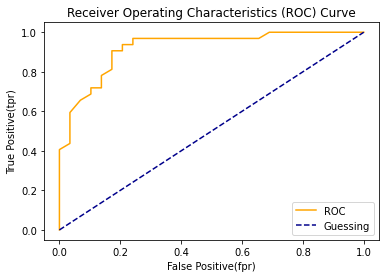

In [93]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plotROC(fpr, tpr):
    """
    Plots a ROC Curve given the false positive rate 
    and true positive rate of a model.
    """
    # Plot roc curve
    plt.plot(fpr,tpr, color="orange", label="ROC")
    # Plot line with predictive power (baseline)
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False Positive(fpr)")
    plt.ylabel("True Positive(tpr)")
    plt.title("Receiver Operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()

plotROC(fpr,tpr)
    


**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In [94]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 5, 27]])

In [95]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,5,27


<AxesSubplot:>

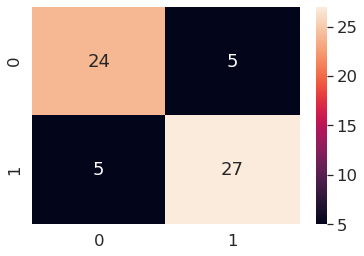

In [96]:
# Make our confusion matrix more visual with Seaborn heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat, annot=True)

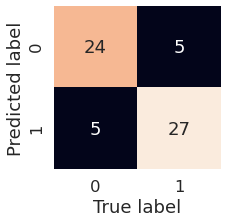

In [97]:
# OR Create function and customize
def plot_conf_mat(conf_mat):
    """
    Plots the confusion matrix using Seaborn heatmap
    """
    fig, ax = ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
plot_conf_mat(conf_mat)

**Classification Report**

In [98]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



# 5. Improving a model
1. First predictions = baseline predictions
    * First model = baseline model
2. From a data perpective:
    * Could we collect more data
    * Could we improve the quaility of the data
3. From a model perpective:
    * Is there a better model we could use
    * Could we improve the current model
4. Hyperparameters vs. Parameters
    * Parameters = model find therse patterns in data
    * Hyperparameters = adjustable settings on a model to potentially improve its ability to find patterns
        * Three ways to adjust Hyperparameters:
            1. By Hand
            2. Randomly with RandomSearchCV
            3. Exhaustively with GridSearchCV

In [99]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [100]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let's make three sets:
  1. Training
  2. Validation
  3. Test
  
We're going to try and adjust
 * `max_depth`
 * `max_features`
 * `min_samples_leaf`
 * `min_samples_split`
 * `n_estimators`

In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_preds(y_true, y_preds):
    """
    Performs evaulation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}%")
    print(f"Recall: {recall:.2f}%")
    print(f"F1-score: {f1:.2f}%")
    
    return metric_dict

In [102]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split data into train, validation  and test sets using splicing
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

# Instantiate Classifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy: 82.22%
Precision: 0.81%
Recall: 0.88%
F1-score: 0.85%


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

### 5.2 Hyperparameter tuning with RandomizedSearchCV
Does cross validation by default

In [103]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators":[10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
# May need to increase to get better results
rs_clf = RandomizedSearchCV(estimator = clf,
                            param_distributions = grid,
                            n_iter = 10, # running 10 times
                            cv = 5,
                            verbose = 2)
# Fit the RandomizedSearchCV version to clf
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samp

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [104]:
rs_clf.best_params_ # Best results accross 10 models

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [105]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 81.97%
Precision: 0.77%
Recall: 0.86%
F1-score: 0.81%


### 5.3 Hyperparameter tuning with GridSearchCV
Does every possible combination

In [106]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [107]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [108]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator = clf,
                            param_grid = grid_2,
                            cv = 5,
                            verbose = 2)
# Fit the RandomizedSearchCV version to clf
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto,

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [109]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [110]:
# Make predictions with the best hyperparameters
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 78.69%
Precision: 0.74%
Recall: 0.82%
F1-score: 0.78%


In [111]:
# Finding the Most important features
clf = RandomForestClassifier(n_jobs=1,
                            max_depth = None,
                            max_features = 'sqrt',
                            min_samples_leaf = 1,
                            min_samples_split = 6,
                            n_estimators = 200
                            )
clf.fit(X_train,y_train);
clf.feature_importances_


array([0.08419921, 0.03362101, 0.12125618, 0.05970901, 0.06232666,
       0.00685406, 0.0202387 , 0.11846695, 0.06530815, 0.13238775,
       0.04829839, 0.13235342, 0.11498051])

In [112]:
feature_dict = dict(zip(heart_disease_shuffled.columns, list(clf.feature_importances_)))
feature_dict

{'age': 0.08419921124516504,
 'sex': 0.03362101132635358,
 'cp': 0.1212561832550309,
 'trestbps': 0.05970900780385098,
 'chol': 0.062326663495677,
 'fbs': 0.0068540592779101055,
 'restecg': 0.020238695216838083,
 'thalach': 0.11846695087220237,
 'exang': 0.0653081452994462,
 'oldpeak': 0.13238774799426758,
 'slope': 0.04829839113452287,
 'ca': 0.13235342415577872,
 'thal': 0.11498050892295664}

<AxesSubplot:>

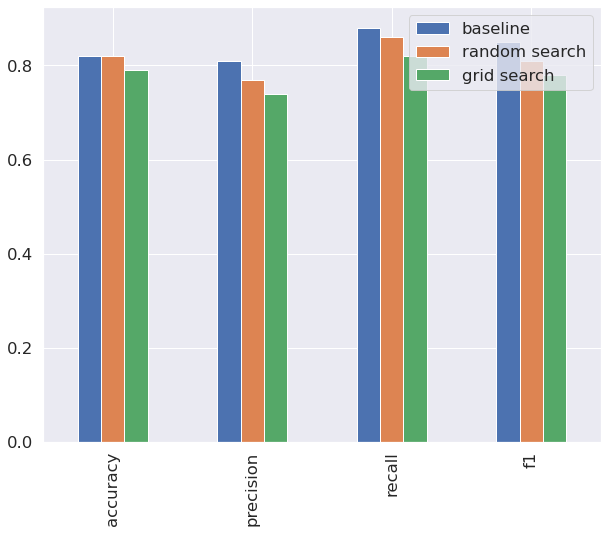

In [113]:
# Compare our Different Model Metrics
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics
    
})
compare_metrics.plot.bar(figsize = (10,8))

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models
1. Using Python's `pickle` module
2. Using the `joblib` module *Peferred Method

### Method 1: Pickle

In [114]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("models/gs_random_forest_model_1.pkl", "wb"))

In [115]:
# Load a pickle model
loaded_pickle_model = pickle.load(open("models/gs_random_forest_model_1.pkl", "rb"))

In [116]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds) # Should make the gs_metrics

Accuracy: 78.69%
Precision: 0.74%
Recall: 0.82%
F1-score: 0.78%


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

### Method 2: joblib

In [117]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="models/gs_random_forest_model_1.joblib")

['models/gs_random_forest_model_1.joblib']

In [118]:
# Load a joblib model
loaded_job_model = load(filename="models/gs_random_forest_model_1.joblib")

In [119]:
# Make and evaulate joblib predictions
joblib_y_preds = loaded_job_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds) # Should make the gs_metrics

Accuracy: 78.69%
Precision: 0.74%
Recall: 0.82%
F1-score: 0.78%


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}